In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

#####
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.pipeline import make_pipeline

In [2]:
spdf = pd.read_csv("./data/StudentsPerformance.csv")
spdf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
for c in spdf.columns:
    print(c,"  ",spdf[c].unique(),"\n")
spdf.columns

gender    ['female' 'male'] 

race/ethnicity    ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental level of education    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch    ['standard' 'free/reduced'] 

test preparation course    ['none' 'completed'] 

math score    [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading score    [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

writing 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
for edu in spdf["parental level of education"].unique():
    edf = spdf[spdf["parental level of education"]==edu]
    print(edu,"   ",edf["math score"].mean())

bachelor's degree     69.38983050847457
some college     67.1283185840708
master's degree     69.7457627118644
associate's degree     67.88288288288288
high school     62.13775510204081
some high school     63.497206703910614


In [5]:
numeric = ["math score","reading score","writing score"]
categorical = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [6]:
## PREDICT CATEGORICAL VARIABLES BASED ON NUMERIC VARIABLES

for c in categorical:

    y = spdf[c]

    X = spdf[numeric]

    # encoder = make_column_transformer(
    #     (OneHotEncoder(sparse=False, handle_unknown="ignore"), 
    #      ["sex"]),
    #     remainder="passthrough",
    # )
    scaler = StandardScaler()
    model = KNeighborsClassifier(n_neighbors=5)
    pipeline = make_pipeline(scaler, model)

    scores_acc = cross_val_score(pipeline, X, y, cv=5, scoring="accuracy")
    print('Accuracy for '+c+':  '+str(scores_acc.mean()))

    # scores_prec = cross_val_score(pipeline, X, y, cv=50, scoring="precision")
    # print('Precision: '+str(scores_prec.mean()))

    # scores_rec = cross_val_score(pipeline, X, y, cv=50, scoring="recall")
    # print('Recall: '+str(scores_rec.mean()))

Accuracy for gender:  0.857
Accuracy for race/ethnicity:  0.231
Accuracy for parental level of education:  0.217
Accuracy for lunch:  0.666
Accuracy for test preparation course:  0.671


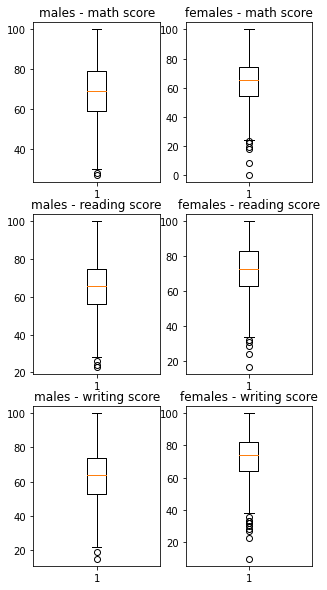

In [7]:
males = spdf[spdf['gender']=='male']
females = spdf[spdf['gender']=='female']

fig, axs = plt.subplots(3,2,figsize=(5,10))
for i in range(len(numeric)):
    c = numeric[i]
    axs[i,0].boxplot(males[c])#,alpha=0.5,bins=10)
    axs[i,0].set_title('males - '+c)
    axs[i,1].boxplot(females[c])#,alpha=0.5,bins=10)
    axs[i,1].set_title('females - '+c)

MSE for math score:  213.12412
MSE for reading score:  214.08560000000003
MSE for writing score:  206.03044


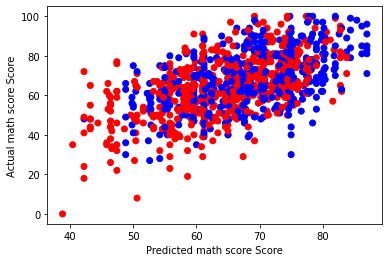

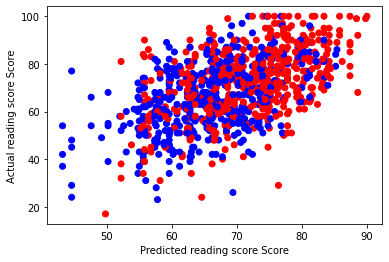

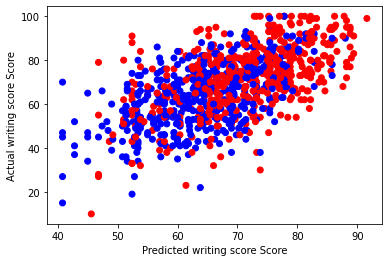

In [20]:
## PREDICT NUMERIC VARIABLES BASED ON CATEGORICAL VARIABLES

for n in numeric:

    y = spdf[n]

    X = spdf[categorical]

    # cats = [ x for x in f if X[x].dtype!=int ]
    encoder = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown="ignore"), 
         categorical),
        remainder="passthrough",
    )
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=5)
    pipeline = make_pipeline(encoder, scaler, model)
    
    # Calculate MSE
    
    mse = np.mean(-cross_val_score(
        pipeline, X, y, 
        cv=10, scoring="neg_mean_squared_error"
    ))
    print('MSE for '+n+':  '+str(mse))
    
    # Visualize predictions
    
    encoder.fit(X)
    X_enc = encoder.transform(X)
    scaler.fit(X_enc)
    X_sc = scaler.transform(X_enc)
    model.fit(X_sc,y)
    preds = model.predict(X_sc)
    
    clrmap = {'male':'b','female':'r'}
    plt.figure()
    plt.scatter(x=preds,y=y,c=X['gender'].map(clrmap))
    plt.xlabel('Predicted '+n+' Score')
    plt.ylabel('Actual '+n+' Score')
    